# FraudGuard – Exploratory Data Analysis (EDA)

This notebook explores transaction patterns and fraud behavior in the dataset.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


Matplotlib is building the font cache; this may take a moment.


In [4]:
import pandas as pd

df = pd.read_csv("../data/creditcard.csv")
print(df.shape)
df.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape


(284807, 31)

Fraud transactions represent less than 0.2% of the dataset, making this a highly imbalanced classification problem.


In [6]:
df['Class'].value_counts(normalize=True)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

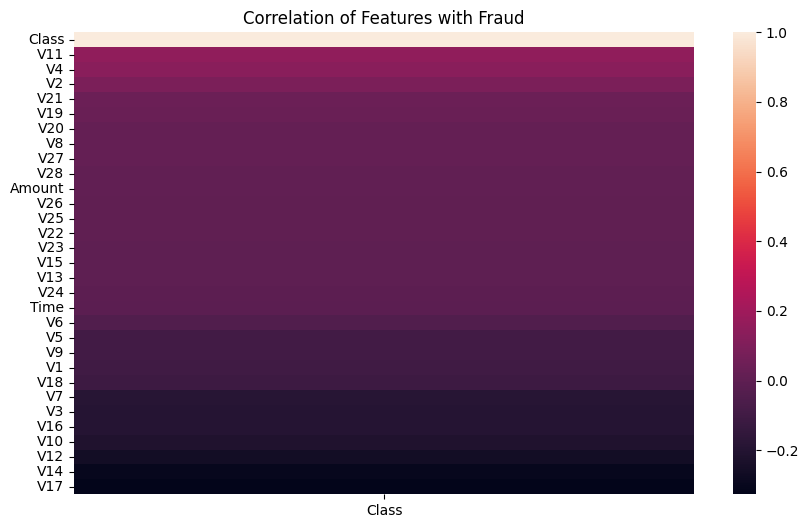

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr()[['Class']].sort_values(by='Class', ascending=False), annot=False)
plt.title("Correlation of Features with Fraud")
plt.show()


No single feature strongly correlates with fraud, indicating the need for multi-feature and behavior-based modeling.


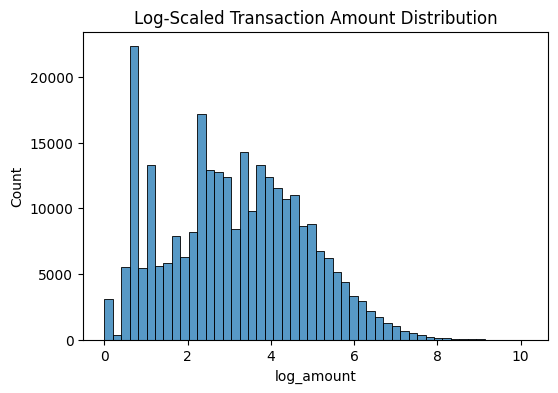

In [9]:
df['log_amount'] = np.log1p(df['Amount'])

plt.figure(figsize=(6,4))
sns.histplot(df['log_amount'], bins=50)
plt.title("Log-Scaled Transaction Amount Distribution")
plt.show()


Log transformation helps normalize transaction amounts for better model learning.


### EDA Summary

- The dataset is extremely imbalanced, requiring specialized evaluation metrics.
- Fraud transactions do not always involve high amounts.
- Time-based patterns indicate abnormal behavior during certain hours.
- No single feature can detect fraud alone, justifying ensemble and behavior-based models.
